In [4]:
import pyreadstat
import pandas as pd

In [5]:
df = pd.read_parquet("PISA_2022_cleaned.parquet")
df = df.rename({'IKT':'ICT'}, axis=1)

In [6]:
df.head()

,one-on-one,ICT,video,small_group,large_group,none,spol,letnik
481056,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0
481057,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10.0
481058,0.0,0.0,0.0,0.0,0.0,1.0,2.0,10.0
481059,0.0,0.0,1.0,0.0,0.0,1.0,2.0,10.0
481060,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0


In [7]:
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if any conversion failed
df.dropna(inplace=True)

# Calculate the number of occurrences of the values 1 and 2 in the "spol" column
num_value_1 = df['spol'].value_counts().get(1, 0)
num_value_2 = df['spol'].value_counts().get(2, 0)

# Calculate the percentage of occurrences of the values 1 and 2 in the "spol" column
percentage_value_1 = (num_value_1 / len(df)) * 100
percentage_value_2 = (num_value_2 / len(df)) * 100

# Print the results
print(f"Number of occurrences of value 1 in 'spol': {num_value_1}")
print(f"Percentage of occurrences of value 1 in 'spol': {percentage_value_1:.2f}%")
print(f"Number of occurrences of value 2 in 'spol': {num_value_2}")
print(f"Percentage of occurrences of value 2 in 'spol': {percentage_value_2:.2f}%")


Number of occurrences of value 1 in 'spol': 2999
Percentage of occurrences of value 1 in 'spol': 47.19%
Number of occurrences of value 2 in 'spol': 3356
Percentage of occurrences of value 2 in 'spol': 52.81%


C:\Users\borbr\AppData\Local\Temp\ipykernel_10468\1826925514.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='letnik', data=df, palette='viridis')


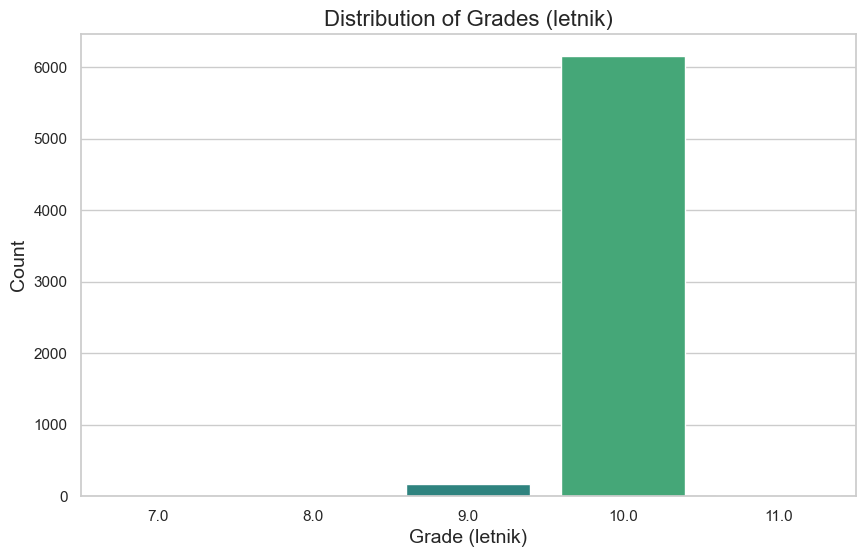

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='letnik', data=df, palette='viridis')

# Set plot title and labels
plt.title('Distribution of Grades (letnik)', fontsize=16)
plt.xlabel('Grade (letnik)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()

C:\Users\borbr\AppData\Local\Temp\ipykernel_10468\1353882904.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=yes_counts.index, y=yes_counts.values, palette=[palette[col] for col in yes_counts.index])


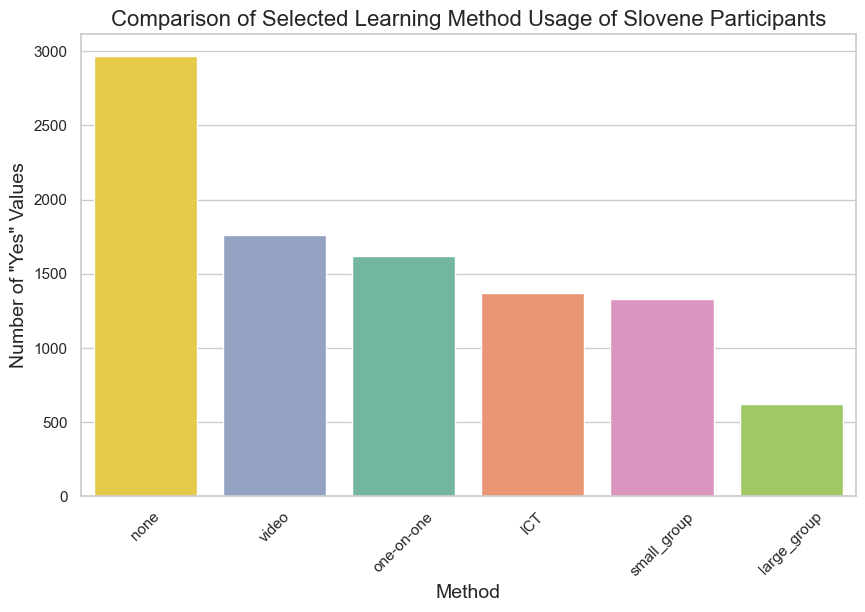

In [11]:
columns_for_visualization = ["one-on-one", "ICT", "video", "small_group", "large_group", "none"]

def plot_learning_methods(df, columns, palette):
    # Filter the dataframe to include only the specified columns
    df_filtered = df[columns]

    # Convert all columns to numeric, coercing errors to NaN (if needed)
    df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')

    # Drop rows with NaN values if any conversion failed
    df_filtered.dropna(inplace=True)

    # Calculate the count of '1's for each learning method in the filtered dataframe
    yes_counts = df_filtered.sum().sort_values(ascending=False)

    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")

    # Create a bar plot for the counts of '1's
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=yes_counts.index, y=yes_counts.values, palette=[palette[col] for col in yes_counts.index])

    # Set plot title and labels
    ax.set_title('Comparison of Selected Learning Method Usage of Slovene Participants', fontsize=16)
    ax.set_xlabel('Method', fontsize=14)
    ax.set_ylabel('Number of "Yes" Values', fontsize=14)

    # Display the plot
    plt.xticks(rotation=45)  # Rotate labels if needed for better visibility
    plt.show()

# Generate a nicer color palette using seaborn
nicer_palette = sns.color_palette("Set2", len(columns_for_visualization))

# Map the nicer palette to the columns
color_palette = dict(zip(columns_for_visualization, nicer_palette))

plot_learning_methods(df, columns_for_visualization, color_palette)

In [ ]:
num_rows = df.shape[0]

print("Number of rows in DataFrame:", num_rows)

Number of rows in DataFrame: 6355
